In [1]:
import pandas as pd
import warnings
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime ,timedelta 
import datetime as dt
import math
warnings.filterwarnings('ignore')

In [2]:
online=pd.read_csv("OrderData.csv")
online = online[online["Status"].isin(["Finish","Return"])]

In [3]:
print("There are %d customers in this dataset." %len(pd.unique(online["MemberID"])))
print("There are %d records." %online.shape[0])

There are 181388 customers in this dataset.
There are 450454 records.


In [4]:
online.head()

,TradesGroupCode,TradesDateTime,ChannelType,ChannelDetail,PaymentType,ShippingType,TsCount,Qty,TotalSalesAmount,TotalPrice,TotalDiscount,TotalPromotionDiscount,TotalCouponDiscount,TotalLoyaltyDiscount,Status,MemberID
0,TG190926B00185,2019-09-26 01:15:10.297,OfficialECom,MobileWeb,JKOPay,Home,1,1,680,680,0,0,0,0,Finish,JAE7ypAI%2BmBkMAd1REpPJI3zcEQBI9WBTeg5QlsEri4%3D
1,TG190926X00450,2019-09-26 21:16:59.167,OfficialECom,iOSApp,JKOPay,FamilyPickup,4,4,2660,2760,-100,0,-100,0,Finish,UB%2F0WwXAdW5GhwWmVB036mhSMcUnbK1IA5kXp31h4XQ%3D
2,TG190928M00620,2019-09-28 11:31:04.847,OfficialECom,MobileWeb,JKOPay,FamilyPickup,1,1,1016,1280,-264,-64,-200,0,Finish,rKUVLmkXyUqqVN8zU1UB40kuhBLRok8FvQtDZTGIS00%3D
3,TG190928U00383,2019-09-28 18:23:28.130,OfficialECom,iOSApp,JKOPay,FamilyPickup,1,1,1380,1480,-100,0,-100,0,Finish,WpUUri%2BOuznMIisbG5ramILffQkqoQr8TPOj0L8lqN8%3D
6,TG190930U00304,2019-09-30 18:11:13.930,OfficialECom,DesktopOfficialWeb,JKOPay,FamilyPickup,1,1,1880,1880,0,0,0,0,Finish,e2qLn%2F56IF%2Fgbd9DzhAksayeVEVwHxGYtV15nldbZ8...


In [5]:
#Qty =負值代表退貨
online[online["TsCount"]!=online["Qty"]].head(1)

,TradesGroupCode,TradesDateTime,ChannelType,ChannelDetail,PaymentType,ShippingType,TsCount,Qty,TotalSalesAmount,TotalPrice,TotalDiscount,TotalPromotionDiscount,TotalCouponDiscount,TotalLoyaltyDiscount,Status,MemberID
12,TG191002Q00291,2019-10-02 14:14:39.180,OfficialECom,DesktopOfficialWeb,JKOPay,Home,2,-2,-1199,-1199,0,0,0,0,Return,VgB2jqtj014XsyRKw%2Bbp7tAWMYkjb1hTEeT%2BgWhKwA...


In [6]:
online[online["TsCount"]<-online["Qty"]].head(1)

,TradesGroupCode,TradesDateTime,ChannelType,ChannelDetail,PaymentType,ShippingType,TsCount,Qty,TotalSalesAmount,TotalPrice,TotalDiscount,TotalPromotionDiscount,TotalCouponDiscount,TotalLoyaltyDiscount,Status,MemberID
1435,TG200308S01758,2020-03-08 16:59:57.377,OfficialECom,iOSApp,JKOPay,Home,5,-6,-3120,-3220,100,0,100,0,Return,ZJcp5HsmhLuZJ%2FcdgvG6PSYrN5F7tf%2B7ksQO7dEQPp...


In [7]:
online[online["TradesGroupCode"]=="TG200308S01758"]

,TradesGroupCode,TradesDateTime,ChannelType,ChannelDetail,PaymentType,ShippingType,TsCount,Qty,TotalSalesAmount,TotalPrice,TotalDiscount,TotalPromotionDiscount,TotalCouponDiscount,TotalLoyaltyDiscount,Status,MemberID
1435,TG200308S01758,2020-03-08 16:59:57.377,OfficialECom,iOSApp,JKOPay,Home,5,-6,-3120,-3220,100,0,100,0,Return,ZJcp5HsmhLuZJ%2FcdgvG6PSYrN5F7tf%2B7ksQO7dEQPp...
1436,TG200308S01758,2020-03-08 16:59:57.377,OfficialECom,iOSApp,JKOPay,Home,5,6,3120,3220,-100,0,-100,0,Finish,ZJcp5HsmhLuZJ%2FcdgvG6PSYrN5F7tf%2B7ksQO7dEQPp...


In [8]:
orderslave=pd.read_csv("OrderSlaveData.csv")

orderslave = orderslave[orderslave["Status"].isin(["Finish","Return"])]
orderslave.head()

,TradesGroupCode,TradesDateTime,ChannelType,ChannelDetail,PaymentType,ShippingType,OuterProductSkuCode,ProductSkuCode,SalePageCode,Qty,TotalSalesAmount,TotalPrice,TotalDiscount,Status,MemberID
2,TG190926X00450,2019-09-26 21:16:59.167,OfficialECom,iOSApp,JKOPay,FamilyPickup,8309-3WH34,11397813.0,3904262.0,1,2660,2760,-100,Finish,UB%2F0WwXAdW5GhwWmVB036mhSMcUnbK1IA5kXp31h4XQ%3D
3,TG190926X00450,2019-09-26 21:16:59.167,OfficialECom,iOSApp,JKOPay,FamilyPickup,SSS84,16578545.0,5575777.0,1,2660,2760,-100,Finish,UB%2F0WwXAdW5GhwWmVB036mhSMcUnbK1IA5kXp31h4XQ%3D
4,TG190928U00383,2019-09-28 18:23:28.130,OfficialECom,iOSApp,JKOPay,FamilyPickup,002-3WH40,8771599.0,3136651.0,1,1380,1480,-100,Finish,WpUUri%2BOuznMIisbG5ramILffQkqoQr8TPOj0L8lqN8%3D
5,TG190929N01374,2019-09-29 12:52:03.887,OfficialECom,AndroidApp,JKOPay,FamilyPickup,AAA24,12551665.0,4310845.0,1,2079,2179,-100,Finish,m%2BdiqkQX4SRkxdjhDJcvgfoWgNue9os%2B%2FcYbuMUl...
6,TG190930U00304,2019-09-30 18:11:13.930,OfficialECom,DesktopOfficialWeb,JKOPay,FamilyPickup,20139-5BK38,16992609.0,5729423.0,1,1880,1880,0,Finish,e2qLn%2F56IF%2Fgbd9DzhAksayeVEVwHxGYtV15nldbZ8...


In [9]:
#TsCount 訂單交易品類數(品項)
# Qty :交易數量
#check = orderslave[orderslave["TradesGroupCode"]=="TG200308S01758"]
#print(pd.unique(check[check["Qty"]>0]["OuterProductSkuCode"]))
#print(check[check["Qty"]<0]["Qty"].sum())

In [10]:
pd.value_counts(online["ChannelDetail"])

MobileWeb             103639
iOSApp                 95409
AndroidApp             49140
DesktopOfficialWeb     35123
3                      33155
15                     23710
5                      22751
6                      13257
18                     11991
12                     11717
003                    10771
21                      9012
015                     7253
005                     6706
006                     5323
24                      4990
021                     1840
024                     1404
012                     1274
018                     1097
4                        210
004                      200
099                      112
99                        84
16951                     34
1                         31
122                       31
21483                     26
001                       22
24472                     20
16951                     14
122                       14
14191                     13
25496                     12
14191         

In [11]:
def mapping(x):
    if str(x)[0] not in ["M","i","A","D"]:
        return "physical stores"
    else:
        return x
online["ChannelDetail"]=online["ChannelDetail"].apply(lambda x:mapping(x))
pd.value_counts(online["ChannelDetail"])

physical stores       167143
MobileWeb             103639
iOSApp                 95409
AndroidApp             49140
DesktopOfficialWeb     35123
Name: ChannelDetail, dtype: int64

In [12]:
online["TradesDateTime"]=pd.to_datetime(online['TradesDateTime'].astype("str").str[0:19],format="%Y-%m-%d %H:%M:%S")
online["TradesDate"]=online["TradesDateTime"].apply(lambda x:x.date())
online["TradesIndex"]=online["TradesDateTime"].apply(lambda x:dt.datetime(x.year,x.month,1))
online["TradesYear"]=online["TradesIndex"].apply(lambda x:x.year)
online["TradesMonth"]=online["TradesIndex"].apply(lambda x:x.month)
online["hour"]=online["TradesDateTime"].apply(lambda x:x.hour)
online["week day"]=online["TradesDateTime"].dt.day_name()
#####First visit time
online["First Visit"] = online.groupby('MemberID')['TradesDateTime'].transform('min').apply(lambda x:dt.datetime(x.year,x.month,x.day))
online["First Visit_Index"]=online["First Visit"].apply(lambda x:dt.datetime(x.year,x.month,1))
###old or new
def f(x):
    if x["TradesIndex"]>x["First Visit_Index"]:
        return "Old Customer" 
    else: 
        return "New Customer"
online["old_or_new"]=online.apply(lambda x:f(x),axis=1)

###also processing on orderslave 
orderslave["TradesDateTime"]=pd.to_datetime(orderslave['TradesDateTime'].astype("str").str[0:19],format="%Y-%m-%d %H:%M:%S")
orderslave["TradesDate"]=orderslave["TradesDateTime"].apply(lambda x:x.date())
orderslave["TradesIndex"]=orderslave["TradesDateTime"].apply(lambda x:dt.datetime(x.year,x.month,1))
orderslave["TradesYear"]=orderslave["TradesIndex"].apply(lambda x:x.year)
orderslave["TradesMonth"]=orderslave["TradesIndex"].apply(lambda x:x.month)
orderslave["First Visit"] = orderslave.groupby('MemberID')['TradesDateTime'].transform('min').apply(lambda x:dt.datetime(x.year,x.month,x.day))
orderslave["First Visit_Index"]=orderslave["First Visit"].apply(lambda x:dt.datetime(x.year,x.month,1))
orderslave["old_or_new"]=orderslave.apply(lambda x:f(x),axis=1)
orderslave["week day"]=orderslave["TradesDateTime"].dt.day_name()
orderslave["hour"]=orderslave["TradesDateTime"].apply(lambda x:x.hour)

###snapshot_date
snapshot_date = pd.to_datetime(online.TradesDateTime).max() + timedelta(days=1)
snapshot_date=datetime.strptime(str(snapshot_date), "%Y-%m-%d %H:%M:%S")
snapshot_date=pd.to_datetime(snapshot_date)
print(snapshot_date)

online.head()

2020-05-01 23:53:00


,TradesGroupCode,TradesDateTime,ChannelType,ChannelDetail,PaymentType,ShippingType,TsCount,Qty,TotalSalesAmount,TotalPrice,...,MemberID,TradesDate,TradesIndex,TradesYear,TradesMonth,hour,week day,First Visit,First Visit_Index,old_or_new
0,TG190926B00185,2019-09-26 01:15:10,OfficialECom,MobileWeb,JKOPay,Home,1,1,680,680,...,JAE7ypAI%2BmBkMAd1REpPJI3zcEQBI9WBTeg5QlsEri4%3D,2019-09-26,2019-09-01,2019,9,1,Thursday,2019-09-26,2019-09-01,New Customer
1,TG190926X00450,2019-09-26 21:16:59,OfficialECom,iOSApp,JKOPay,FamilyPickup,4,4,2660,2760,...,UB%2F0WwXAdW5GhwWmVB036mhSMcUnbK1IA5kXp31h4XQ%3D,2019-09-26,2019-09-01,2019,9,21,Thursday,2019-09-26,2019-09-01,New Customer
2,TG190928M00620,2019-09-28 11:31:04,OfficialECom,MobileWeb,JKOPay,FamilyPickup,1,1,1016,1280,...,rKUVLmkXyUqqVN8zU1UB40kuhBLRok8FvQtDZTGIS00%3D,2019-09-28,2019-09-01,2019,9,11,Saturday,2015-07-17,2015-07-01,Old Customer
3,TG190928U00383,2019-09-28 18:23:28,OfficialECom,iOSApp,JKOPay,FamilyPickup,1,1,1380,1480,...,WpUUri%2BOuznMIisbG5ramILffQkqoQr8TPOj0L8lqN8%3D,2019-09-28,2019-09-01,2019,9,18,Saturday,2019-09-28,2019-09-01,New Customer
6,TG190930U00304,2019-09-30 18:11:13,OfficialECom,DesktopOfficialWeb,JKOPay,FamilyPickup,1,1,1880,1880,...,e2qLn%2F56IF%2Fgbd9DzhAksayeVEVwHxGYtV15nldbZ8...,2019-09-30,2019-09-01,2019,9,18,Monday,2019-09-30,2019-09-01,New Customer


In [13]:
online =online.drop_duplicates()

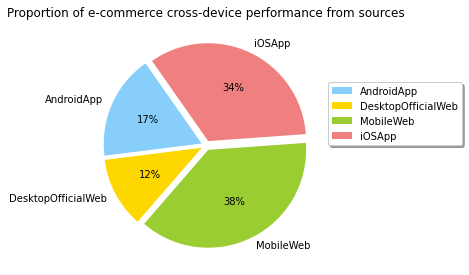

In [14]:
####Proportion of e-commerce cross-device performance from sources
ChannelDetail= online[online["ChannelDetail"]!="physical stores"].groupby("ChannelDetail")["TotalSalesAmount"].sum()/online[online["ChannelDetail"]!="physical stores"].groupby("ChannelDetail")["TotalSalesAmount"].sum().sum()
def pie_pct_format(value):
    """ Determine the appropriate format string for the pie chart percentage label
    Args:
        value: value of the pie slice
    Returns:
        str: formated string label; if the slice is too small to fit, returns an empty string for label
    """
    return '' if value < 7 else '%.0f%%' % value

fig = plt.figure(figsize=(4.5, 4.5), facecolor='white', edgecolor='white')
colors = ['lightskyblue', 'gold', 'yellowgreen', 'lightcoral']
explode = (0.05, 0.05, 0.05, 0.05)


patches, texts, autotexts = plt.pie(ChannelDetail.values, labels=ChannelDetail.index, colors=colors,
                                    explode=explode, autopct=pie_pct_format,
                                    shadow=False,  startangle=125)
for text, autotext in zip(texts, autotexts):
    if autotext.get_text() == '':
        text.set_text('')  # If the slice is small to fit, don't show a text label
plt.legend(labels=ChannelDetail.index, loc=(1,0.5), shadow=True)
plt.title("Proportion of e-commerce cross-device performance from sources")
pass

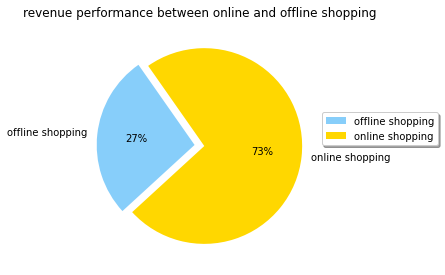

In [15]:
####線上線下 業績占比

online["Channel"]=online["ChannelDetail"].apply(lambda x:  "online shopping"   if x!="physical stores"  else "offline shopping")
ChannelDetail= online.groupby("Channel")["TotalSalesAmount"].sum()/online.groupby("Channel")["TotalSalesAmount"].sum().sum()
fig = plt.figure(figsize=(4.5, 4.5), facecolor='white', edgecolor='white')
colors = ['lightskyblue', 'gold']
explode = (0.05, 0.05)
patches, texts, autotexts = plt.pie(ChannelDetail.values, labels=ChannelDetail.index, colors=colors,
                                    explode=explode, autopct=pie_pct_format,
                                    shadow=False,  startangle=125)
for text, autotext in zip(texts, autotexts):
    if autotext.get_text() == '':
        text.set_text('')  # If the slice is small to fit, don't show a text label
plt.legend(labels=ChannelDetail.index, loc=(1,0.5), shadow=True)
plt.title("revenue performance between online and offline shopping")
pass

Text(0.5, 1.0, 'Offline weekday revenue')

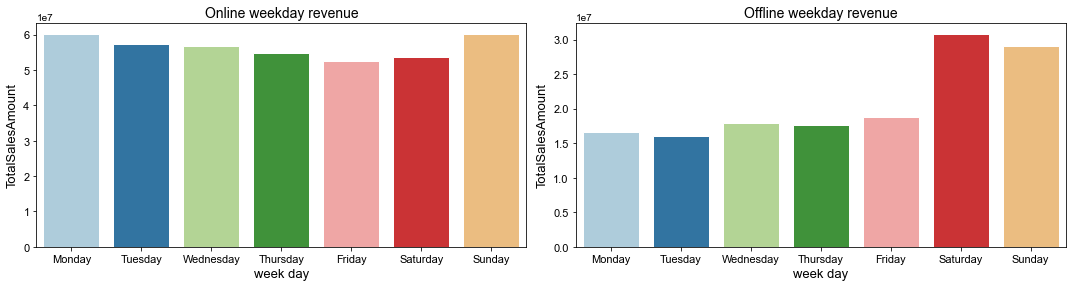

In [16]:
#small["week day"]
week_day_online=online[online["Channel"]=="online shopping"].groupby("week day")["TotalSalesAmount"].sum().reset_index(name="TotalSalesAmount")
week_day_offline=online[online["Channel"]=="offline shopping"].groupby("week day")["TotalSalesAmount"].sum().reset_index(name="TotalSalesAmount")

fig, ax = plt.subplots(1,2,figsize=(15,4))
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
sns.set_style("darkgrid")
sns.barplot(data=week_day_online,x="week day",y="TotalSalesAmount",palette = "Paired",ax=ax[0], order = day_order)
sns.barplot(data=week_day_offline,x="week day",y="TotalSalesAmount",palette = "Paired",ax=ax[1], order = day_order)
ax[0].xaxis.label.set_size(13)
ax[0].yaxis.label.set_size(13)
ax[1].xaxis.label.set_size(13)
ax[1].yaxis.label.set_size(13)
ax[0].yaxis.set_tick_params(labelsize=11)
ax[0].xaxis.set_tick_params(labelsize=11)
ax[1].yaxis.set_tick_params(labelsize=11)
ax[1].xaxis.set_tick_params(labelsize=11)
plt.tight_layout()
ax[0].set_title(label="Online weekday revenue",fontdict={'fontsize':14})
ax[1].set_title(label="Offline weekday revenue",fontdict={'fontsize':14})

Text(0.5, 1.0, 'Offline revenue by hour')

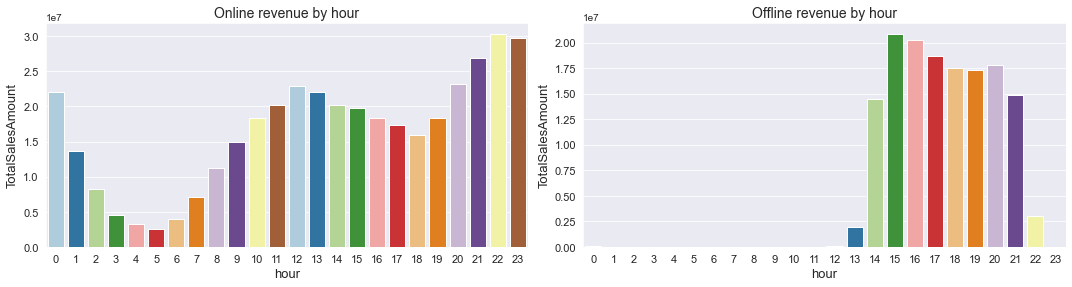

In [17]:
hour_online=online[online["Channel"]=="online shopping"].groupby("hour")["TotalSalesAmount"].sum().reset_index(name="TotalSalesAmount")
hour_offline=online[online["Channel"]=="offline shopping"].groupby("hour")["TotalSalesAmount"].sum().reset_index(name="TotalSalesAmount")
fig, ax = plt.subplots(1,2,figsize=(15,4))
hour_order = list(range(24))
sns.set_style("darkgrid")
sns.barplot(data=hour_online,x="hour",y="TotalSalesAmount",palette = "Paired",ax=ax[0], order = hour_order)
sns.barplot(data=hour_offline,x="hour",y="TotalSalesAmount",palette = "Paired",ax=ax[1], order = hour_order)
ax[0].xaxis.label.set_size(13)
ax[0].yaxis.label.set_size(13)
ax[1].xaxis.label.set_size(13)
ax[1].yaxis.label.set_size(13)
ax[0].yaxis.set_tick_params(labelsize=11)
ax[0].xaxis.set_tick_params(labelsize=11)
ax[1].yaxis.set_tick_params(labelsize=11)
ax[1].xaxis.set_tick_params(labelsize=11)
plt.tight_layout()
ax[0].set_title(label="Online revenue by hour",fontdict={'fontsize':14})
ax[1].set_title(label="Offline revenue by hour",fontdict={'fontsize':14})

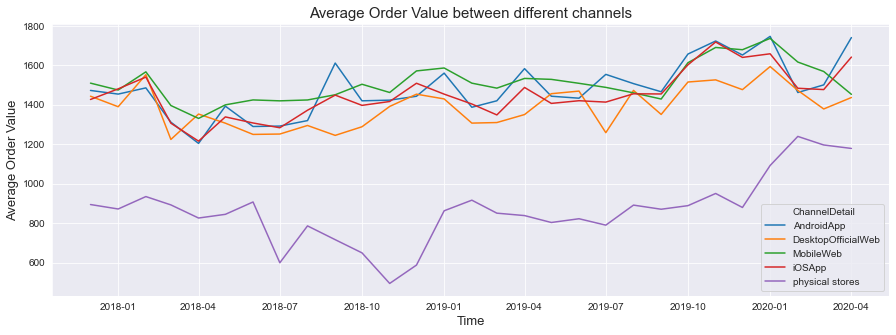

In [21]:
#per_customer_transaction
#客單價=有效訂單總金額（已成交）/消費總人數 
#      =有效訂單總金額（已成交）/成交訂單總筆數

transaction_channel=online.groupby(["TradesIndex","ChannelDetail"]).agg({
'TotalSalesAmount': 'sum','TradesGroupCode':'count'}).reset_index()
transaction_channel["per_customer_transaction"]=transaction_channel["TotalSalesAmount"]/transaction_channel["TradesGroupCode"]
transaction_channel=transaction_channel[["TradesIndex","ChannelDetail","per_customer_transaction"]]
transaction_channel=transaction_channel.set_index("TradesIndex")
transaction_channel=transaction_channel[(transaction_channel.index>"2017-11-01") & (transaction_channel.index<"2020-05-01")]

plt.figure(figsize=[15,5])
sns.set_style("darkgrid")
ax=sns.lineplot(data=transaction_channel, x=transaction_channel.index, y="per_customer_transaction",hue="ChannelDetail")
               
plt.title("Average Order Value between different channels",fontsize = 15)
plt.xlabel('Time')
plt.ylabel('Average Order Value')
ax.xaxis.label.set_size(13)
ax.yaxis.label.set_size(13)

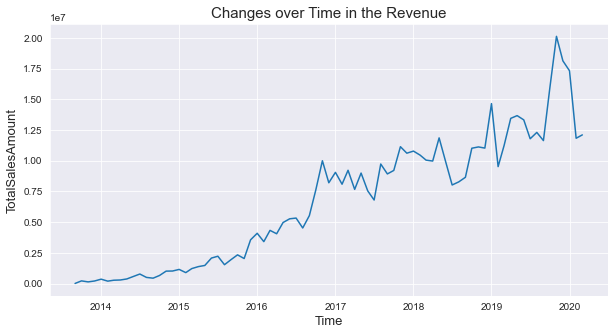

In [22]:
year_month_totalSalesAmount= online.groupby("TradesIndex")["TotalSalesAmount"].sum().reset_index(name='TotalSalesAmount') 
year_month_totalSalesAmount=year_month_totalSalesAmount.iloc[:-1]
plt.figure(figsize=[10,5])
sns.set_style("darkgrid")
ax=sns.lineplot(data=year_month_totalSalesAmount, x="TradesIndex", y="TotalSalesAmount")
plt.xlabel('Time')
plt.title("Changes over Time in the Revenue",fontsize = 15)
ax.xaxis.label.set_size(13)
ax.yaxis.label.set_size(13)

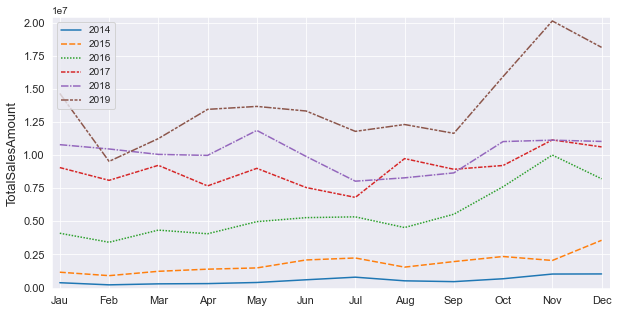

In [23]:
growth=pd.crosstab(online["TradesYear"], online["TradesMonth"],values=online["TotalSalesAmount"],aggfunc='sum').iloc[1:-1].T
growth.index=['Jau','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
plt.figure(figsize=[10,5])
sns.set_style("darkgrid")
ax=sns.lineplot(data=growth,sort= False)
ax.yaxis.set_tick_params(labelsize=11)
ax.xaxis.set_tick_params(labelsize=11)
ax.yaxis.label.set_size(13)
plt.ylabel('TotalSalesAmount')
plt.legend(loc='upper left')
plt.margins(0.015, tight=True)

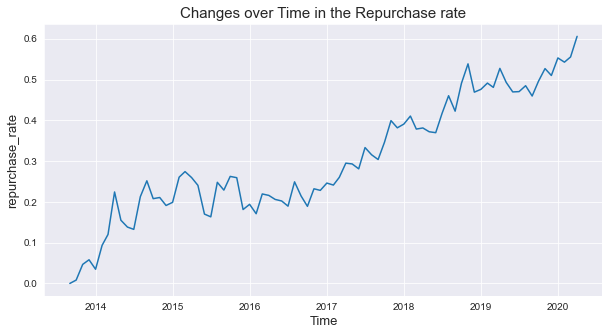

In [25]:
repurchase_rate=pd.crosstab(online["TradesIndex"],online["old_or_new"])
repurchase_rate["repurchase_rate"]=repurchase_rate["Old Customer"]/repurchase_rate[["New Customer","Old Customer"]].sum(axis=1)
#購買次數大於1次的人/所有購買過的人=回購率
plt.figure(figsize=[10,5])
sns.set_style("darkgrid")
ax=sns.lineplot(data=repurchase_rate, x=repurchase_rate.index, y="repurchase_rate")
plt.xlabel('Time')
plt.title("Changes over Time in the Repurchase rate",fontsize = 15)
ax.xaxis.label.set_size(13)
ax.yaxis.label.set_size(13)

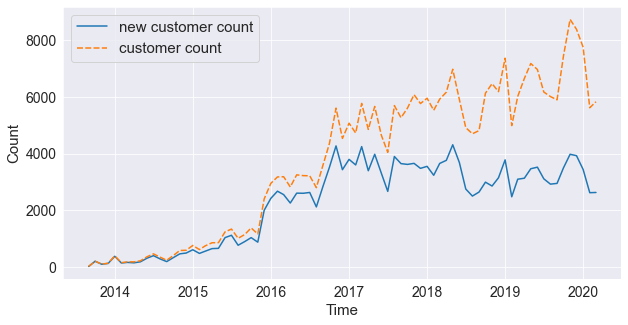

In [26]:
customers_visit=online.groupby(["TradesIndex"])["MemberID"].nunique().reset_index()
gain_customer_count=online.groupby("First Visit_Index")["MemberID"].nunique().reset_index()
gain_customer_count.columns=["Date","new customer count"]
customers_visit.columns=["Date","customer count"]
customer_info=pd.merge(gain_customer_count,customers_visit,on="Date")
customer_info=customer_info.iloc[:-1]
customer_info=customer_info.set_index("Date")
plt.figure(figsize=[10,5])
ax=sns.lineplot(data=customer_info,sort= False)
ax.yaxis.set_tick_params(labelsize=14)
ax.xaxis.set_tick_params(labelsize=14)
ax.xaxis.label.set_size(15)
ax.yaxis.label.set_size(15)
plt.xlabel('Time')
plt.ylabel('Count')
plt.legend(prop={'size': 15})

181388


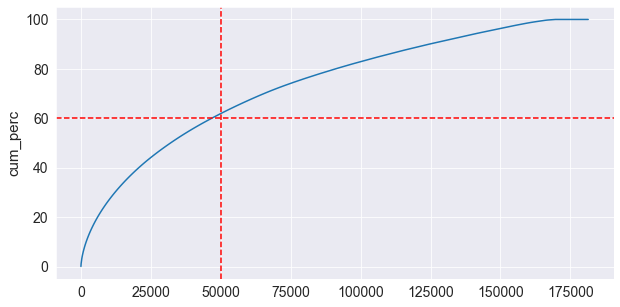

In [27]:
#80/20 Rule
check = online.groupby("MemberID")["TotalSalesAmount"].sum().reset_index(name="TotalSalesAmount").sort_values("TotalSalesAmount",ascending=False)
print(check.shape[0])
check['cum_sum'] = check["TotalSalesAmount"].cumsum()
check['cum_perc'] = round(100*check.cum_sum/check["TotalSalesAmount"].sum(),2)

plt.figure(figsize=[10,5])
ax=sns.lineplot(x=list(range(check.shape[0])),y=check["cum_perc"])
ax.yaxis.set_tick_params(labelsize=14)
ax.xaxis.set_tick_params(labelsize=14)
ax.xaxis.label.set_size(15)
ax.yaxis.label.set_size(15)
ax.axhline(60, color="red", linestyle="--")
ax.axvline(50000, color="red", linestyle="--")

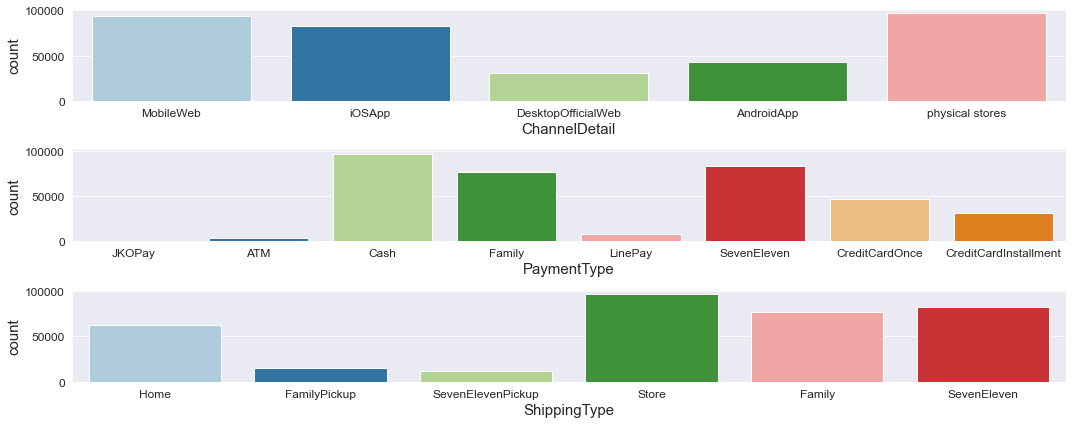

In [28]:
small =online[online["Status"]=="Finish"]
fig, ax = plt.subplots(3,1,figsize=(15,6))
sns.set_style("darkgrid")
for i,j in enumerate(['ChannelDetail','PaymentType','ShippingType']):
    sns.countplot(small[j],palette = "Paired",ax=ax[i])
    ax[i].xaxis.label.set_size(15)
    ax[i].yaxis.label.set_size(15)
    ax[i].yaxis.set_tick_params(labelsize=12)
    ax[i].xaxis.set_tick_params(labelsize=12)
    plt.tight_layout()

In [29]:
#### get the yearly hottest product
orderslave["ProductSkuCode"]=orderslave["ProductSkuCode"].replace('nan', np.nan)
small =orderslave.dropna(subset=["OuterProductSkuCode"])
hot_product=small.groupby(["TradesYear","OuterProductSkuCode"]).agg({'TotalSalesAmount': sum})
hot_product=hot_product['TotalSalesAmount'].groupby(level=0, group_keys=False)
hot_product=hot_product.nlargest(5).reset_index(name="TotalSalesAmount").set_index("TradesYear")
hot_product["Rank"]=list(range(1,6))*8
for i in range(2013,2021):
    print("The hottest product for %d is:" % i, list(hot_product[hot_product.index==i]["OuterProductSkuCode"].values))
hot_product

The hottest product for 2013 is: ['AAA04', 'AAA01', 'AAA02', 'AAA03', '193-26BK37']
The hottest product for 2014 is: ['AAA01', 'AAA04', 'AAA02', 'A223-2WH38', 'A223-2WH37']
The hottest product for 2015 is: ['防水噴霧', 'AAA01', 'AAA02', '331BK01', 'AAA04']
The hottest product for 2016 is: ['Z002F', 'SSS11', 'AAA05', 'AAA05F', '592-1WH37']
The hottest product for 2017 is: ['Z002F', 'SSS34', 'AAA05F', 'SSS20', 'AAA05']
The hottest product for 2018 is: ['SSS34', 'Z002F', 'SSS57', 'AAA05F', 'SSS54']
The hottest product for 2019 is: ['Z002F', 'SSS34', 'SSS03', 'Z006F', 'SSS82']
The hottest product for 2020 is: ['BBB10', 'BBB15', 'BBB12', 'CCC06', 'DDD04']


,OuterProductSkuCode,TotalSalesAmount,Rank
TradesYear,,,
2013,AAA04,87892,1
2013,AAA01,56211,2
2013,AAA02,25197,3
2013,AAA03,19451,4
2013,193-26BK37,8600,5
2014,AAA01,126712,1
2014,AAA04,102986,2
2014,AAA02,96437,3
2014,A223-2WH38,50353,4


In [30]:
member=pd.read_csv("MemberData.csv")
highly_repeated= member.groupby("MemberID").size().index[np.where(member.groupby("MemberID").size()>4)[0]]
member=member[~member["MemberID"].isin(highly_repeated)]
assert len(np.where(member.groupby("MemberID").size()>4)[0])==0
member=member.sort_values(by=['MemberID', 'RegisterDateTime']).drop_duplicates(subset=['MemberID'], keep='first')
assert len(np.where(member.groupby("MemberID").size()>1)[0])==0
print(member.shape)

(313224, 11)


In [31]:
###data cleaning and convert birthday to Age

member["Birthday"]=member["Birthday"].apply(lambda x:str(x).replace("0001-01-01", '1900-01-01'))
member["Birthday"]=member["Birthday"].replace('1900-01-01', np.NaN)

small = member[member["Birthday"].str.startswith("000" , na=False)]
print(small.shape)
member[member["Birthday"].str.startswith("000", na=False)]=np.nan
small = member[member["Birthday"].str.startswith("000", na=False)]
print(small.shape)

small= member[member["Birthday"].str.startswith("00", na=False)]
print(small.shape)
print(small.iloc[0]["MemberID"],small.iloc[0]["Birthday"])

member["Birthday"]=member["Birthday"].apply(lambda x:str(1911+int(str(x[2:4])))+x[4:]  if str(x)[:2]=="00"  else x)
print(member[member["MemberID"]==small.iloc[0]["MemberID"]]["Birthday"])
small= member[member["Birthday"].str.startswith("00", na=False)]
print(small.shape)

def age(x):
    try:
        check= int(str(x)[:4])
        if check<2010 and check>1940:
            return int(2021-pd.to_datetime(x).year)
        else:
            return np.nan
    except:
        return np.nan

member["Age"]=member["Birthday"].map(age)

(5, 11)
(0, 11)
(18, 11)
6efxsZYP5ItYPpLmTHrDXlOIrmYh5dAcevL7wG7ocl4%3D 0079-06-07
229524    1990-06-07
Name: Birthday, dtype: object
(0, 11)


Text(0, 0.5, 'frequency')

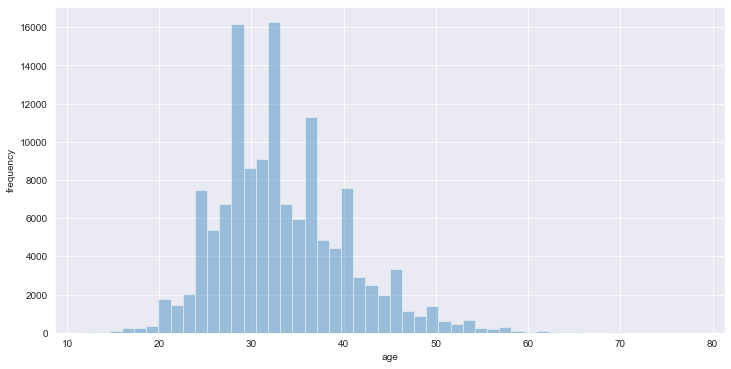

In [32]:
plt.figure(figsize=[12,6])
sns.set_style("darkgrid")
sns.distplot(member["Age"],kde=False)
plt.xlabel("age")
plt.ylabel("frequency")

In [33]:
member["Age"].median()

32.0

Female    133609
Male        2281
Name: Gender, dtype: int64


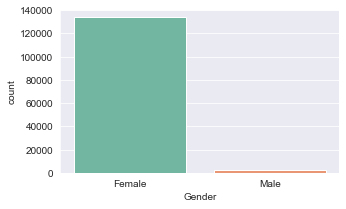

In [34]:
plt.figure(figsize=[5,3])
sns.countplot(member['Gender'],palette = "Set2")
###womens shoe retailer
print(pd.value_counts(member['Gender']))

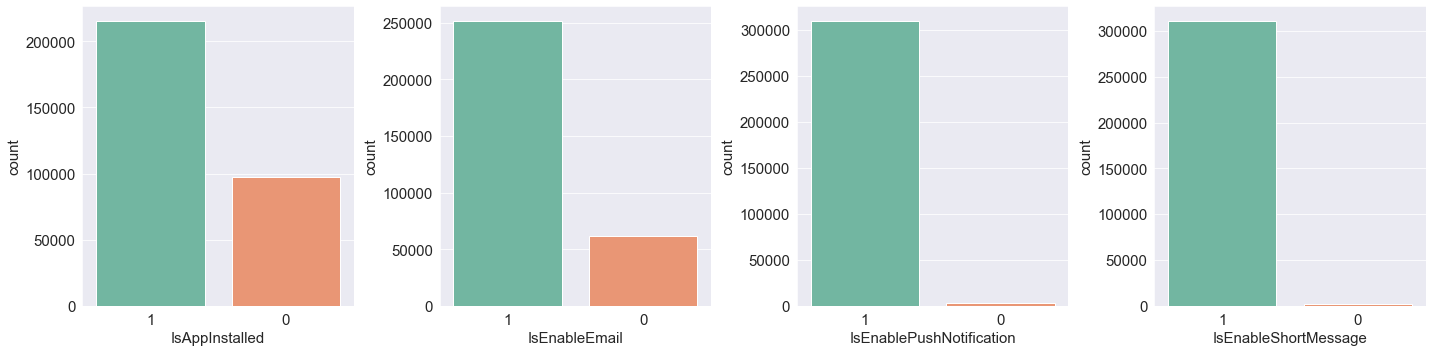

In [35]:
fig, ax = plt.subplots(1,4,figsize=(20,5))
for i,j in enumerate(['IsAppInstalled','IsEnableEmail','IsEnablePushNotification','IsEnableShortMessage']):
    sns.countplot(member[j].apply(lambda x:str(int(x)) if pd.isnull(x)==False else x),palette = "Set2",ax=ax[i])
    ax[i].xaxis.label.set_size(15)
    ax[i].yaxis.label.set_size(15)
    ax[i].yaxis.set_tick_params(labelsize=15)
    ax[i].xaxis.set_tick_params(labelsize=15)
    plt.tight_layout()

In [36]:
online= pd.merge(online,member,how="left",left_on="MemberID",right_on="MemberID")

In [37]:
def get_channel(x):
    x=list(set(x))
    if len(x)==2:
        return "OMO"
    elif x[0]=="physical stores":
        return "offline shopping"
    else:
        return "online shopping"

online["buying type"]=online.groupby("MemberID")["ChannelDetail"].transform(lambda x: [x.unique()]*len(x)).apply(lambda x:get_channel(x))

In [38]:
pd.value_counts(online["buying type"])

online shopping     184818
offline shopping    148146
OMO                 114324
Name: buying type, dtype: int64

In [39]:
data_2019=online[(online["TradesYear"]==2019) & (online["Status"].isin(["Return","Finish"]))]
temp=data_2019.groupby(["buying type","MemberID"])['TotalSalesAmount'].sum().reset_index(name="sum")
data_2019=data_2019[["MemberID","IsAppInstalled"]]
data_2019["IsAppInstalled"]=data_2019["IsAppInstalled"].astype('Int64')
temp=pd.merge(temp,data_2019,how="left",on="MemberID")
is_app_installed_diff_for_2019=temp.groupby(["buying type","IsAppInstalled"]).agg({"sum":"mean","MemberID":"count"})
is_app_installed_diff_for_2019["MemberID"]=is_app_installed_diff_for_2019["MemberID"].astype('Int64')
is_app_installed_diff_for_2019["sum"]=is_app_installed_diff_for_2019["sum"].apply(lambda x:round(x,2))
is_app_installed_diff_for_2019=is_app_installed_diff_for_2019.T
is_app_installed_diff_for_2019.index=["年消費金額","年消費次數"]
is_app_installed_diff_for_2019

buying type         OMO          offline shopping          online shopping  \
IsAppInstalled        0        1                0        1               0   
年消費金額           4155.78  5828.39          2763.96  5205.96         2749.77   
年消費次數              2034    33264             1618    59582           14831   

buying type              
IsAppInstalled        1  
年消費金額           3672.44  
年消費次數             27063

In [40]:
time=online.sort_values(['MemberID','TradesDate']).groupby('MemberID')['TradesDate'].diff().dropna()
time=time.reset_index()

In [41]:
time["day"]=time["TradesDate"].apply(lambda x:x.days)
time=time[time["day"]>0]
time["day"].median()

80.0

In [42]:
#####NAPL　Model 
record=online.groupby(["MemberID","TradesDate"])["TotalSalesAmount"].sum().reset_index(name='TotalSalesAmount') \
                             .sort_values(['TotalSalesAmount'], ascending=False)
record=record[record["TotalSalesAmount"]>0]
record["check"]=record.groupby("MemberID")["TradesDate"].transform(lambda x:(snapshot_date-pd.to_datetime(x).max()).days<=240)
record["count_for_3c"]=record["TradesDate"].apply(lambda x:int((snapshot_date-pd.to_datetime(x)).days<=240))
record["count_for_over_3c"]=record["TradesDate"].apply(lambda x:int((snapshot_date-pd.to_datetime(x)).days>240))
napl=record.groupby(["MemberID","check"]).agg({"count_for_3c":"sum","count_for_over_3c":"sum"}).reset_index()
napl.head()

,MemberID,check,count_for_3c,count_for_over_3c
0,%2B%2B%2FsALKlNdkh585nb%2F9geIrN84FIZZLkD8qf90...,False,0,1
1,%2B%2B2Sw%2FYbIovLROVPDc%2BeVjbEdn6fTeg7niPBE%...,False,0,1
2,%2B%2B3XVjBiQPLoAXWc7gK%2BTdvTH4J4AmgkeFlB3mmN...,False,0,1
3,%2B%2B6Xs%2FwHblxbDDDYQ9osx6DMUooacHVpAJvv7KWg...,False,0,1
4,%2B%2B6ZXiIdakH%2B77WllacG4cehkRZkwBnSIX2XvAro...,False,0,1


In [43]:
def f(x):
    if x["check"]==True and x["count_for_3c"]>1:
        return "active"
  
    elif x["check"]==True and x["count_for_3c"]==1:
        return "new"
    elif x["check"]==False and x["count_for_over_3c"]>1:
        return "potential"
    else:
        return "lost"
napl["label"]=napl.apply(lambda x:f(x),axis=1)

Text(0.5, 0, 'type')

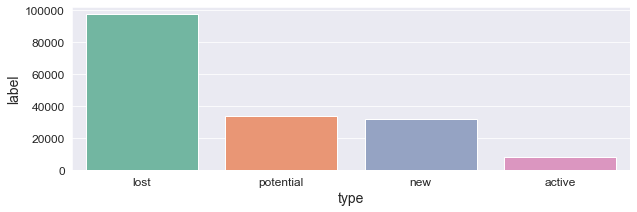

In [44]:
plt.figure(figsize=[10,3])
data=pd.value_counts(napl["label"]).reset_index()
ax=sns.barplot(data=data,x="index",y="label",palette = "Set2")
ax.yaxis.set_tick_params(labelsize=12)
ax.xaxis.set_tick_params(labelsize=12)
ax.xaxis.label.set_size(14)
ax.yaxis.label.set_size(14)
plt.xlabel("type")

In [45]:
###########behavior data

In [46]:
import os

data=os.listdir('123_new')
new=[]
for i in data:
    new.append(i.split('_')[0])
list(set(new))

['addToCart',
 'trafficSource',
 'userRegisteration',
 'categoryPageView',
 'checkout',
 'purchase',
 'mainPageView',
 'productPageView',
 'activityPageView',
 'search']

In [47]:
datalists = dict()
for item in list(set(new)):
    datalists[item] = []
for i in data:
    check=i.split("_")[0]
    datalists[check].append(i)

In [48]:
datalists["categoryPageView"][:5]

['categoryPageView_2018-06-26.csv',
 'categoryPageView_2018-06-27.csv',
 'categoryPageView_2018-06-28.csv',
 'categoryPageView_2018-06-29.csv',
 'categoryPageView_2018-06-30.csv']

In [7]:
df_traffic=pd.concat([pd.read_csv(os.path.join("123_new",datalists["trafficSource"][i]),low_memory = True,usecols = ["did","dc","uid","ht","cs"]) for i in range(len(datalists["trafficSource"]))],axis=0)
df_traffic["cs"]=df_traffic["cs"].apply(lambda x:x.replace("sms","SMS"))
df_traffic["ht"]=df_traffic["ht"].apply(lambda x:datetime.datetime.fromtimestamp(int(x) / 1000).strftime("%Y-%m-%d %H:%M:%S"))

In [23]:
####pd.to_datetime(df_traffic["ht"],format="%Y-%m-%d %H:%M:%S").dt.date.iloc[0]

In [24]:
df_traffic["date"]=pd.to_datetime(df_traffic["ht"],format="%Y-%m-%d %H:%M:%S").dt.date

In [25]:
print(df_traffic.shape)

(44261420, 6)


In [26]:
df_traffic.drop_duplicates(subset=["did","date"],inplace=True)
print(df_traffic.shape)
df_traffic.head()

(3999999, 6)


,dc,did,uid,ht,cs,date
0,web,cf261d71-475a-4c9e-a35d-590c6de7bb60,NaN,2018-06-26 15:55:42,FBM,2018-06-26
2,web,d5ccc9f9-e0e3-4b69-8516-b9426bd71e8b,NaN,2018-06-27 00:15:28,FBM,2018-06-27
3,web,5b9b2990-e058-46f7-a19c-17637eee6fd0,NaN,2018-06-26 21:57:24,FBM,2018-06-26
4,web,fc0f2e7b-4449-4e15-fd30-25dd3e292a18,NaN,2018-06-26 17:14:31,FBM,2018-06-26
6,web,87e979ca-42af-431c-ba22-161b85712e3c,NaN,2018-06-26 23:56:51,FBM,2018-06-26


In [36]:
####
df_traffic["date"].iloc[0]==pd.to_datetime("2018-06-26")

True

In [27]:
check = pd.to_datetime(df_traffic.ht).dt.hour

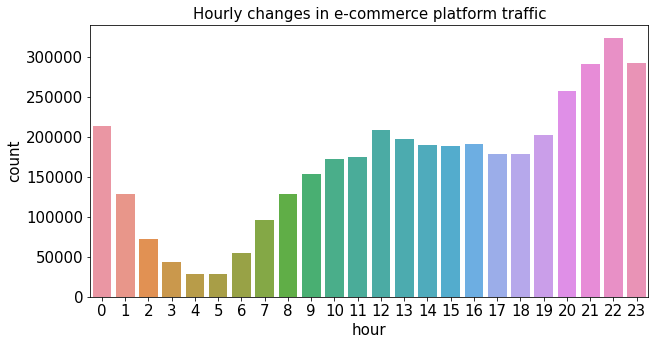

In [30]:
plt.figure(figsize=(10,5))
ax=sns.countplot(check)
plt.title('Hourly changes in e-commerce platform traffic',fontsize = 15)
plt.xlabel('hour')
ax.xaxis.label.set_size(15)
ax.yaxis.label.set_size(15)
ax.yaxis.set_tick_params(labelsize=15)
ax.xaxis.set_tick_params(labelsize=15)

In [31]:
#df_traffic["cs"]=df_traffic["cs"].apply(lambda x:x.replace("sms","SMS"))
count_traffic=df_traffic["cs"].value_counts().reset_index()
count_traffic.head(8)

,index,cs
0,google,1501953
1,FBAD,948047
2,FBPO,381359
3,tagtoo,185685
4,m.facebook.com,175357
5,affiliate,164156
6,BRIDGEWELL,160010
7,LINE,91813


In [32]:
print("前八大流量來源佔總體流量的: %.3f" % (count_traffic.head(8)["cs"].sum()/count_traffic["cs"].sum()))

前八大流量來源佔總體流量的: 0.902


In [33]:
def traffic_map(x):
    if x in count_traffic["index"][:8].values:
        return x
    else:
        return "other"
df_traffic["cs"]=df_traffic["cs"].apply(lambda x:traffic_map(x))
df_traffic["cs"].value_counts()

google            1501953
FBAD               948047
other              391619
FBPO               381359
tagtoo             185685
m.facebook.com     175357
affiliate          164156
BRIDGEWELL         160010
LINE                91813
Name: cs, dtype: int64

In [37]:
convertion_cal=pd.concat([pd.read_csv(os.path.join("123_new",datalists["purchase"][i]),low_memory = True,usecols = ["did","ht"]) for i in range(len(datalists["purchase"]))],axis=0)

convertion_cal["ht"]=convertion_cal["ht"].apply(lambda x:datetime.datetime.fromtimestamp(int(x) / 1000).strftime("%Y-%m-%d %H:%M:%S"))
convertion_cal["date"]= pd.to_datetime(convertion_cal["ht"],format="%Y-%m-%d %H:%M:%S").dt.date
convertion_cal["count"]=1

In [38]:
convertion_cal.drop_duplicates(subset=["did","date"],inplace=True)

In [39]:
df_traffic=pd.merge(df_traffic,convertion_cal,how="left",on=["did","date"])

In [40]:
#df_traffic["count"].isnull().mean()

In [41]:
df_traffic["count"].fillna(0, inplace=True)

Text(0, 0.5, 'MemberShip percentage')

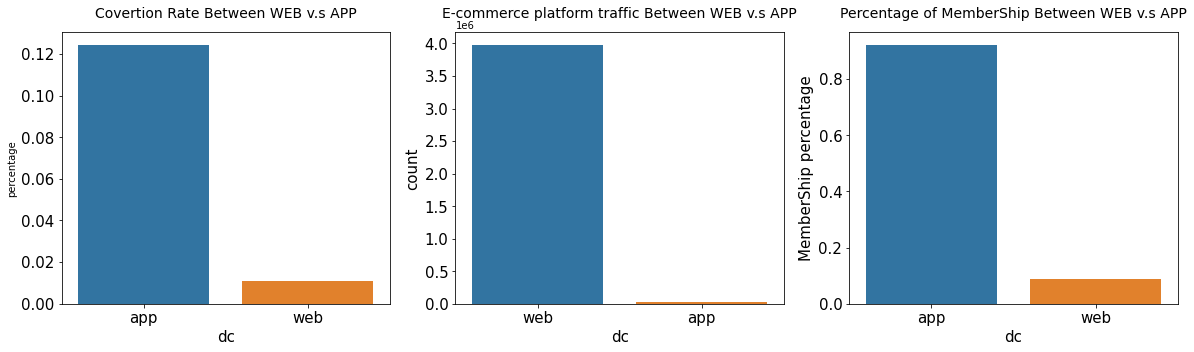

In [42]:
fig, ax = plt.subplots(1,3,figsize=(20,5))

sns.barplot(data=df_traffic.groupby("dc")["count"].mean().reset_index(),x="dc",y="count",ax=ax[0])
sns.countplot(df_traffic.dc,ax=ax[1])
sns.barplot(data=df_traffic.groupby("dc")["uid"].apply(lambda x: x.notnull().mean()).reset_index(),x="dc",y="uid",ax=ax[2])


for i in range(3):
    ax[i].xaxis.label.set_size(15)
    ax[i].yaxis.label.set_size(15)
    ax[i].yaxis.set_tick_params(labelsize=15)
    ax[i].xaxis.set_tick_params(labelsize=15)
ax[0].set_title(label="Covertion Rate Between WEB v.s APP",fontdict={'fontsize':14},y=1.03)
ax[1].set_title(label="E-commerce platform traffic Between WEB v.s APP",fontdict={'fontsize':14},y=1.03)
ax[2].set_title(label="Percentage of MemberShip Between WEB v.s APP",fontdict={'fontsize':14},y=1.03)
ax[0].set_ylabel('percentage', fontsize='medium')
ax[2].set_ylabel('MemberShip percentage')

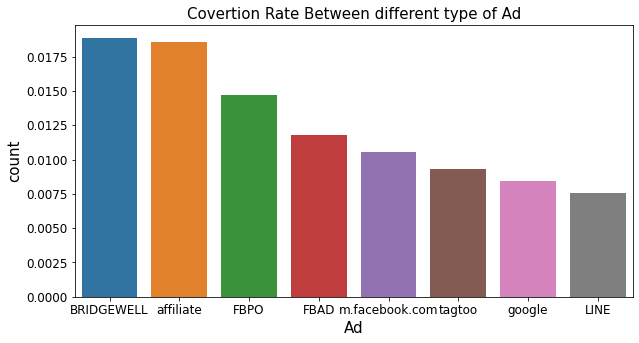

In [43]:
ad_conversion=df_traffic.groupby("cs")["count"].mean().reset_index().sort_values("count",ascending=False)
ad_conversion=ad_conversion[ad_conversion["cs"]!="other"]

plt.figure(figsize=(10,5))
plt.title('Covertion Rate Between different type of Ad',fontsize = 15)

ax=sns.barplot(data=ad_conversion,x="cs",y="count")
plt.xlabel('Ad')
ax.xaxis.label.set_size(15)
ax.yaxis.label.set_size(15)
ax.yaxis.set_tick_params(labelsize=12)
ax.xaxis.set_tick_params(labelsize=12)

In [35]:
####Repurchase prediction

In [10]:
container=[]
behavior=['activityPageView',
 'categoryPageView',
 'mainPageView',
 'purchase',
 'search',
 'productPageView',
 'checkout',
 'addToCart']
for action in behavior:
    length=len(datalists[action])
    container.extend([pd.read_csv(os.path.join("123_new",datalists[action][i]),low_memory = True) for i in range(length)])
df_big=pd.concat(container,axis=0)
df_big.dropna(subset=["uid"],inplace=True)
df_big.drop(["mid","ul","geoid"],axis=1,inplace=True)
df_big["ht"]=df_big["ht"].apply(lambda x:datetime.datetime.fromtimestamp(int(x) / 1000).strftime("%Y-%m-%d %H:%M:%S"))
df_big["date"]= pd.to_datetime(df_big.ht,format="%Y-%m-%d %H:%M:%S").dt.date
df_big["total"]=df_big["pr1pr"]*df_big["pr1qt"]
df_big.drop_duplicates(inplace=True)
print(df_big.shape)
df_big.head()

(16126450, 14)


,dc,did,uid,ht,bh,pr,tr,ti,pr1id,pr1pr,pr1qt,cu,date,total
612,app,698276b5-a7e3-4f7b-9422-118f431d3e5d,xCGvjX%2FqPxIzncCrS8kY1iCW7Ah3SEqdVa0qpG68yaA%3D,2018-06-27 02:39:21,viewactivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-06-27,NaN
613,app,a244c85e-2cf8-4cbf-9af4-64574e46be82,IbzMz6oLJpDI2dBPhE33jYvOqfMgvqn23Vj7OdYjofg%3D,2018-06-26 19:29:00,viewactivity,3370063.0,NaN,NaN,NaN,NaN,NaN,NaN,2018-06-26,NaN
614,app,a244c85e-2cf8-4cbf-9af4-64574e46be82,IbzMz6oLJpDI2dBPhE33jYvOqfMgvqn23Vj7OdYjofg%3D,2018-06-26 19:27:47,viewactivity,4394949.0,NaN,NaN,NaN,NaN,NaN,NaN,2018-06-26,NaN
615,app,a244c85e-2cf8-4cbf-9af4-64574e46be82,IbzMz6oLJpDI2dBPhE33jYvOqfMgvqn23Vj7OdYjofg%3D,2018-06-26 19:27:38,viewactivity,4394949.0,NaN,NaN,NaN,NaN,NaN,NaN,2018-06-26,NaN
616,app,a244c85e-2cf8-4cbf-9af4-64574e46be82,IbzMz6oLJpDI2dBPhE33jYvOqfMgvqn23Vj7OdYjofg%3D,2018-06-26 19:27:27,viewactivity,4394949.0,NaN,NaN,NaN,NaN,NaN,NaN,2018-06-26,NaN


In [11]:
uid_with_date=df_big.groupby(["uid","date"]).size().index

In [12]:
browse_data=[]
user_date_mapping=dict()
print(uid_with_date.shape)

(2065128,)


In [13]:
%timeit df_big[(df_big["uid"]==uid_with_date[0][0])  & (df_big["date"]==uid_with_date[0][1])]
df_big.set_index("uid",inplace=True)
%timeit  df_big.loc[(df_big.index==uid_with_date[0][0])&(df_big.date==uid_with_date[0][1]) ]
df_big.reset_index(inplace=True)
df_big.set_index(["uid","date"],inplace=True)
%timeit  df_big.loc[(uid_with_date[0][0],str(uid_with_date[0][1]))]
df_big.sort_index(inplace=True)
%timeit  df_big.loc[(uid_with_date[0][0],str(uid_with_date[0][1]))]

1.56 s ± 8.84 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
1.8 s ± 105 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
142 ms ± 7.69 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
1.33 ms ± 344 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [15]:
test_speed=  df_big.loc[(uid_with_date[0][0],str(uid_with_date[0][1]))]
%timeit  test_speed[test_speed["bh"]=="add"]["pr1id"].values
test_speed.reset_index(inplace=True)
test_speed.set_index("bh",inplace=True)
test_speed.sort_index(inplace=True)
%timeit  test_speed[ (test_speed.index =="add")]["pr1id"].values

377 µs ± 8.87 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
301 µs ± 11.6 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [30]:
user_date_mapping=dict()

In [31]:
###############################

In [32]:
for record in uid_with_date:
    ud=[]
    data = df_big.loc[(record[0],str(record[1]))]

    bt=data["bh"].value_counts().to_dict()
    bh_value = data["bh"].values
    
    
    data.reset_index(inplace=True)
    data.set_index("bh",inplace=True)
    data.sort_index(inplace=True)
    
    ###search 次數
    ###重複搜索次數
    if "search" in bh_value:
        ud.append(bt["search"])
        sub_data=data[data.index =="serach"]["pr"].values 
        ud.append(len(sub_data)-len(set(sub_data)))
    else:
        ud.append(0)
        ud.append(0)
        
    ###viewmainpage  點擊次數
    if "viewmainpage" in bh_value:
        ud.append(bt["viewmainpage"])
    else:
        ud.append(0)
    ###viewactivity 點擊次數
    if "viewactivity" in bh_value:
        ud.append(bt["viewactivity"])
    else:
        ud.append(0)

    ###viewproduct  瀏覽幾樣商品(不重複)
    ###重複瀏覽次數
    if "viewproduct" in bh_value:

        sub_data=data[data.index =="viewproduct"]["pr1id"].values 

        ud.append(len(set(sub_data)))
        ud.append(len(sub_data)-len(set(sub_data)))
    else:
        ud.append(0)
        ud.append(0)
   
    ###viewcategory 點擊次數
    ###viewcategory 行為參數種類
    if "viewcategory" in bh_value:
        ud.append(bt["viewcategory"])
        sub_data=data[data.index =="viewcategory"]["pr"].values 
        ud.append(len(set(sub_data)))
    else:
        ud.append(0)
        ud.append(0)
        
        
    ###add to cart 次數
    if "add" in bh_value:
        ud.append(bt["add"])
        ###add to cart 時重複商品次數(移入又移除商品)
        sub_data= data[data.index =="add"]["pr1id"].values
        if len(sub_data)==len(set(sub_data)):  ###無重複商品
            ud.append(0) 
        else:
            ud.append(len(sub_data)-len(set(sub_data)))    
    else:
        ud.append(0)
        ud.append(0)
   
    ###是否有purchase 行為 
    if "purchase" in bh_value:
        ud.append(data[data.index =="purchase"]["total"].sum())
    else:
        ud.append(0)

    ###當日瀏覽行為開始和結束時間差
    minn= pd.to_datetime(data["ht"].min())
    maxx= pd.to_datetime(data["ht"].max())
    delta = (maxx-minn).total_seconds()
    ud.append(delta)

    user_date_mapping[record[0]+" "+str(record[1])]=ud


In [33]:
#### behavior cluster

In [34]:
#user_date_mapping

In [49]:
import pickle
#import lux
#with open("user_date_map.pkl", "wb") as f:
 #     pickle.dump(user_date_mapping,f)

In [50]:
with open("user_date_map.pkl", "rb") as f:
     user_date_mapping = pickle.load(f)

In [51]:
user_date_mapping=pd.DataFrame.from_dict(user_date_mapping, orient='index',
                                        columns=["search count","duplicate search count","click count(viewmainpage)",
                                                "click count(viewactivity)","No. products viewed","repeat views count",
                                                 "click count(viewcategory)","viewcategory parm","click count(add)",
                                                  "cart duplicate item count","purchase","time_diff"])
user_date_mapping.head()

,search count,duplicate search count,click count(viewmainpage),click count(viewactivity),No. products viewed,repeat views count,click count(viewcategory),viewcategory parm,click count(add),cart duplicate item count,purchase,time_diff
%2B%2B%2FsALKlNdkh585nb%2F9geIrN84FIZZLkD8qf909HvCU%3D 2019-06-25,0,0,5,0,9,4,10,6,1,0,0.0,30396.0
%2B%2B%2FsALKlNdkh585nb%2F9geIrN84FIZZLkD8qf909HvCU%3D 2019-06-26,0,0,13,4,9,2,7,6,2,0,0.0,1950.0
%2B%2B%2FsALKlNdkh585nb%2F9geIrN84FIZZLkD8qf909HvCU%3D 2019-06-27,0,0,2,0,0,0,0,0,0,0,0.0,1.0
%2B%2B%2FsALKlNdkh585nb%2F9geIrN84FIZZLkD8qf909HvCU%3D 2019-06-28,0,0,11,0,2,1,1,1,0,0,0.0,1696.0
%2B%2B%2FsALKlNdkh585nb%2F9geIrN84FIZZLkD8qf909HvCU%3D 2019-07-03,0,0,5,0,3,0,1,1,0,0,0.0,26170.0


In [52]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

x_scale=StandardScaler().fit_transform(user_date_mapping)

In [53]:
######## no-elbow-point
#sse = {}
#for k in range(2, 11):
 #   kmeans = KMeans(n_clusters=k, random_state=1)
 #   kmeans.fit(x_scale)
 #   sse[k] = kmeans.inertia_ # sum of squared distances to closest cluster cente
# Plot SSE for each *k*
#plt.title('The Elbow Method')
#plt.xlabel('k'); plt.ylabel('SSE')
#sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
#plt.show()

In [54]:
kmeans = KMeans(n_clusters=4, random_state=1)
kmeans.fit(x_scale)

KMeans(n_clusters=4, random_state=1)

In [55]:
user_date_mapping["is_purchase"]=user_date_mapping["purchase"].apply(lambda x:1 if x>0 else 0)
user_date_mapping.drop(["purchase","duplicate search count"],axis=1,inplace=True)
user_date_mapping["label"]=kmeans.labels_

In [56]:
user_date_mapping[user_date_mapping.columns[:-2]]=user_date_mapping[user_date_mapping.columns[:-2]].replace(0,np.NaN)
user_date_mapping.groupby("label").mean()

,search count,click count(viewmainpage),click count(viewactivity),No. products viewed,repeat views count,click count(viewcategory),viewcategory parm,click count(add),cart duplicate item count,time_diff,is_purchase
label,,,,,,,,,,,
0,1.487927,2.175095,1.387789,2.190371,1.677888,1.955863,1.582165,1.409309,1.060098,2516.063684,0.027661
1,2.225217,6.083657,2.400940,6.577787,3.549310,6.194788,3.957148,2.034119,1.073253,25275.363117,0.153149
2,3.443827,11.319336,4.054371,20.732468,15.132135,18.313287,8.116592,5.975208,2.028372,29005.860791,0.450825
3,58.708752,6.863112,2.023923,62.438218,21.139769,14.701016,12.507983,2.323232,2.000000,36721.647059,0.004304


In [57]:
online=online[online["buying type"]!="offline shopping"]
user_date_mapping["user"]=user_date_mapping.index.to_series().str.split(" ").apply(lambda x:x[0])
user_date_mapping["Date"]=user_date_mapping.index.to_series().str.split(" ").apply(lambda x:x[1])
user_date_mapping["Date"]=pd.to_datetime(user_date_mapping.Date,format="%Y-%m-%d").dt.date
user_date_mapping=user_date_mapping.reset_index()[["user","Date","label"]].set_index("Date")
user_date_mapping.head()

,user,label
Date,,
2019-06-25,%2B%2B%2FsALKlNdkh585nb%2F9geIrN84FIZZLkD8qf90...,1
2019-06-26,%2B%2B%2FsALKlNdkh585nb%2F9geIrN84FIZZLkD8qf90...,1
2019-06-27,%2B%2B%2FsALKlNdkh585nb%2F9geIrN84FIZZLkD8qf90...,0
2019-06-28,%2B%2B%2FsALKlNdkh585nb%2F9geIrN84FIZZLkD8qf90...,0
2019-07-03,%2B%2B%2FsALKlNdkh585nb%2F9geIrN84FIZZLkD8qf90...,0


In [141]:
def rfm(data,customer,date):

    data = data[ (data["TradesIndex"]<date) & (data["MemberID"].isin(customer))]
    
    rfm  = data.groupby(["MemberID","TradesDate"])["TotalSalesAmount"].sum().reset_index(name='TotalSalesAmount') \
                             .sort_values(['TotalSalesAmount'], ascending=False)
    
    rfm  = rfm.groupby("MemberID").agg({
'TradesDate': lambda x: (pd.to_datetime(date)-pd.to_datetime(x).max()).days,'TotalSalesAmount': 'sum','MemberID':'size'})
    rfm =rfm.sort_index()
    return rfm
def behavior_count(data,customer,date):
    date_1 = pd.to_datetime(date)-timedelta(days=90)
    date_2 = pd.to_datetime(date)-timedelta(days=180)
    type_1 = data[(data.index < pd.to_datetime(date)) & (data.index>=date_1) & (data.user.isin(customer))]
    type_2 = data[(data.index < date_1) & (data.index>=date_2) & (data.user.isin(customer))]
    d_1 = pd.crosstab(type_1["user"],type_1["label"])
    if 3 not in d_1.columns:
        d_1[3]=0
   
    d_1 = d_1.sort_index()
    d_2 = pd.crosstab(type_2["user"],type_2["label"])
    if 3 not in d_2.columns:
        d_2[3]=0
    d_2 = d_2.sort_index()
    
    return pd.concat([d_1,d_2],axis=1)
def customer_list(data,date,customer):
    one_year = pd.to_datetime(date)-timedelta(days=365)
    data = data[(data["Status"].isin(["Return","Finish"])) & (data["TradesDate"]<pd.to_datetime(date)) & (data["TradesDate"]>=one_year)
               & (~data["MemberID"].isin(customer))]
    
    return np.random.choice(list(set(data["MemberID"].values)),len(customer), replace=False)

In [142]:
########  build feature matrix and training data

In [154]:
start = '2019-01-01'
end = '2020-03-01'
dates = [str(x)[:10] for x in pd.date_range(start, end, freq='MS')]
data=[]
for i in dates:

    rep=list(set(online[(online["old_or_new"]=="Old Customer")  & (online["TradesIndex"]==i)]["MemberID"].values))
    norep = customer_list(online,i,rep)

    d1_rep = behavior_count(user_date_mapping,rep,i)
    d1_norep = behavior_count(user_date_mapping,norep,i)
    rfm_rep =  rfm(online,rep,i)
    rfm_norep =  rfm(online,norep,i)
    no_rep=  pd.merge(rfm_norep,d1_norep,how="left", left_index=True, right_index=True)   
    no_rep["purchase"]=0
    rep= pd.merge(rfm_rep,d1_rep,how="left", left_index=True, right_index=True)                    
    rep["purchase"]=1

    final = pd.concat([rep,no_rep],axis=0)
    final=final.replace(np.nan,0)
    data.append(final)
data=pd.concat(data,axis=0)

In [155]:
data.head()

,TradesDate,TotalSalesAmount,MemberID,0,1,2,3,0,1,2,3,purchase
MemberID,,,,,,,,,,,,
%2B%2B8NpYVoqyjmc8mROiPMlX%2F2J8JlOghaysSF3qbYCVE%3D,49,8692,5,6.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,1
%2B%2FAZAUquHe3Q3Y5jJnaeCo1cC1KMmwIL7A%2Boyfl%2FtLA%3D,619,1243,1,4.0,2.0,0.0,0.0,2.0,0.0,0.0,0.0,1
%2B43bj0VYv4XYtA%2FT%2BnYZmSw6FxyiIHIUsmH9ecoiA9I%3D,104,0,1,3.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,1
%2B5wm5h%2F5Hd4HMWIsSLIGVTigfBJOJnxSBV9hBUBhts4%3D,17,3360,2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
%2B6seMbmt4b1hx0eh0Mz8sjawIfOnr8cLNZWCU8guZeA%3D,192,2960,2,9.0,2.0,0.0,0.0,3.0,1.0,0.0,0.0,1


In [156]:
data.shape

(78392, 12)

In [157]:
from flaml import AutoML
automl = AutoML()
settings = {
    "metric": 'accuracy',
    "task": 'classification',
    "time_budget":2400,
    "log_file_name": "train.log"
}
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
#X_train, X_test, y_train, y_test = train_test_split(
# data.drop("purchase",axis=1), data["purchase"], test_size=0.1, random_state=42,shuffle=True,stratify=data["purchase"])
data = shuffle(data)
automl.fit(X_train=data.drop("purchase",axis=1).values, y_train=data["purchase"].values, **settings,verbose=0)

No low-cost partial config given to the search algorithm. For cost-frugal search, consider providing low-cost values for cost-related hps via 'low_cost_partial_config'.


In [158]:
print('Best hyperparmeter config:', automl.best_config)
print('Best accuracy on validation data: {0:.4g}'.format(1 - automl.best_loss))
print(automl.model)

Best hyperparmeter config: {'early_stopping_rounds': 18, 'learning_rate': 0.0359411584695875}
Best accuracy on validation data: 0.7393


In [159]:
rep_April=list(set(online[(online["old_or_new"]=="Old Customer")  & (online["TradesIndex"]=="2020-04-01")]["MemberID"].values))

def potential_customer(data,date):
    one_year = pd.to_datetime(date)-timedelta(days=365)
    data = data[(data["TradesDate"]<pd.to_datetime(date)) & (data["TradesDate"]>=one_year)]
    
    return list(set(data["MemberID"]))
potential = potential_customer(online,"2020-04-01")
b_p = behavior_count(user_date_mapping,potential,"2020-04-01")
rfm_p =  rfm(online,potential,"2020-04-01")

final=pd.merge(rfm_p,b_p,how="left", left_index=True, right_index=True)  
final=final.replace(np.nan,0)
final.head()

,TradesDate,TotalSalesAmount,MemberID,0,1,2,3,0,1,2,3
MemberID,,,,,,,,,,,
%2B%2B%2FsALKlNdkh585nb%2F9geIrN84FIZZLkD8qf909HvCU%3D,280,1359,1,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0
%2B%2B3XVjBiQPLoAXWc7gK%2BTdvTH4J4AmgkeFlB3mmN7YY%3D,355,3160,1,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0
%2B%2B44iA8rzzl4lYN3dzParPLqAXetHBSwDFIBUBD%2B%2Bt4%3D,210,0,1,3.0,1.0,0.0,0.0,6.0,2.0,0.0,0.0
%2B%2BHVWUHpauba4avsH6qa1JN3VITlhErA3GLSgNEq5SQ%3D,194,7870,1,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0
%2B%2BIQh8016M2jdnkz6608gbhHjiXKrXmUoN68bJz09mI%3D,326,980,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [160]:
repurchase_size = online[(online["old_or_new"]=="Old Customer") & (online["TradesIndex"]<"2020-04-01") ]
repurchase_size.groupby("TradesIndex")["MemberID"].nunique()

TradesIndex
2013-10-01       1
2013-11-01       4
2013-12-01       9
2014-01-01      15
2014-02-01      13
              ... 
2019-11-01    3620
2019-12-01    3234
2020-01-01    3109
2020-02-01    2206
2020-03-01    2439
Name: MemberID, Length: 78, dtype: int64

In [161]:
repurchase_size=repurchase_size.groupby("TradesIndex")["MemberID"].nunique().rolling(3).mean()
print(round(repurchase_size[-1],2))
repurchase_size

2584.67


TradesIndex
2013-10-01            NaN
2013-11-01            NaN
2013-12-01       4.666667
2014-01-01       9.333333
2014-02-01      12.333333
                 ...     
2019-11-01    2901.000000
2019-12-01    3247.666667
2020-01-01    3321.000000
2020-02-01    2849.666667
2020-03-01    2584.666667
Name: MemberID, Length: 78, dtype: float64

In [162]:
#y_pred = automl.predict(final.values)
final["predict"]=automl.predict_proba(final.values)[:,1]
final=final.sort_values("predict",ascending=False)

In [163]:
rep_list = final[:round(repurchase_size[-1])].index
acc_test = len(set(rep_list).intersection(rep_April))/ len(rep_list)
print("回購名單預測 準確率: %.2f" % acc_test)

回購名單預測 準確率: 0.23


In [164]:
#indices = np.random.choice(x_scale.shape[0], 200000, replace=False)
#est=x_scale[indices]

In [165]:
#from sklearn.neighbors import NearestNeighbors
#neighbors = NearestNeighbors(n_neighbors=24)
#neighbors_fit = neighbors.fit(est)
#distances, indices = neighbors_fit.kneighbors(est)

In [166]:
#distances = distances[:,-1]
#distances = np.sort(distances, axis=0)

In [167]:
#plt.plot(distances)

In [168]:
#from kneed import KneeLocator
#kneedle = KneeLocator(range(1,len(distances)+1),  #x values
 #                     distances, # y values
 #                     S=1.0, #parameter suggested from paper
 #                     curve="convex", #parameter from figure
 #                     direction="increasing") #parameter from figure
#round(kneedle.knee_y,2)

In [169]:
#from sklearn.cluster import DBSCAN
###use full dataset>>>>> MemoryError 
###sampling 800000 >>>>  MemoryError 
#indices = np.random.choice(x_scale.shape[0], 800000, replace=False)
#est=x_scale[indices]
#clustering = DBSCAN(eps=7.4, min_samples=24 , n_jobs=-1).fit(est)